In [1]:
import pandas as pd

df1 = pd.read_excel('p1.xlsx')
df2 = pd.read_excel('p2.xlsx')

C:\Users\virgi\AppData\Local\Temp\ipykernel_23708\1819079413.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(categories, inplace=True)
C:\Users\virgi\AppData\Local\Temp\ipykernel_23708\1819079413.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace(categories, inplace=True)


Explained variance ratio: [0.38697245 0.15387549]


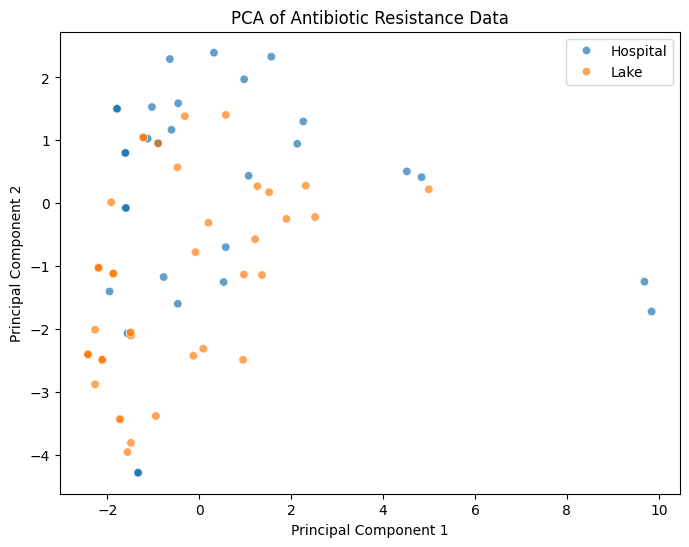

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define the antibiotic columns
antibiotic_columns = ["AMP", "AMO", "CFT", "CFX", "CFL", "CFP", "CFA", "CFO", "CFI", "CFZ", "IME", "AMI", 
                      "GEN", "NEO", "NLA", "ENR", "MAR", "PRA", "DOX", "TET", "NIT", "CHL", "TR/SL"]

# Convert categorical values to numerical (Susceptible=0, Intermediate=1, Resistant=2)
categories = {"S": 0, "I": 1, "*I": 1, "R": 2, "*R": 2}
df1.replace(categories, inplace=True)
df2.replace(categories, inplace=True)

# Drop NLA column (since it has no values)
df1.drop(columns=["NLA"], inplace=True, errors="ignore")
df2.drop(columns=["NLA"], inplace=True, errors="ignore")

# Fill missing values with mode 
df1.fillna(df1.mode().iloc[0], inplace=True)
df2.fillna(df2.mode().iloc[0], inplace=True)

# Ensure both df1 and df2 contain only the antibiotic columns (using reindex)
df1 = df1.reindex(columns=antibiotic_columns, fill_value=-1)
df2 = df2.reindex(columns=antibiotic_columns, fill_value=-1)

# Standardize both datasets
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
df2_scaled = scaler.transform(df2)  # Use the same scaler trained on df1

# Apply PCA
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)
df2_pca = pca.transform(df2_scaled)  # Use the same PCA model trained on df1

# Convert PCA results to DataFrame
df1_pca = pd.DataFrame(df1_pca, columns=["PC1", "PC2"])
df2_pca = pd.DataFrame(df2_pca, columns=["PC1", "PC2"])

# Add source labels for visualization
df1_pca["Source"] = "Hospital"
df2_pca["Source"] = "Lake"

# Combine both datasets for visualization
df_pca_combined = pd.concat([df1_pca, df2_pca], ignore_index=True)

# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_combined["PC1"], y=df_pca_combined["PC2"], hue=df_pca_combined["Source"], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Antibiotic Resistance Data")
plt.legend()
plt.show()


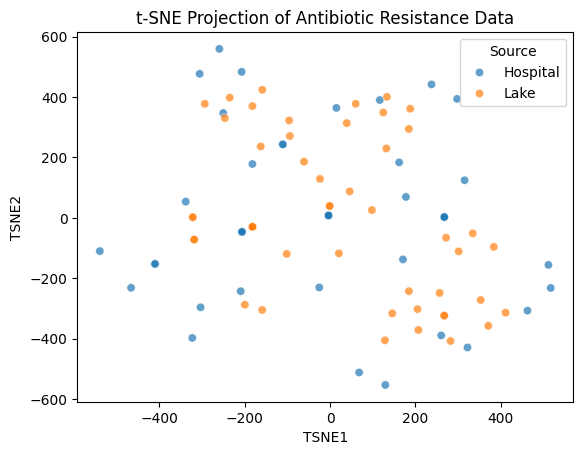

In [3]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
df1_tsne = tsne.fit_transform(df1_scaled)
df2_tsne = tsne.fit_transform(df2_scaled)

df1_tsne = pd.DataFrame(df1_tsne, columns=["TSNE1", "TSNE2"])
df2_tsne = pd.DataFrame(df2_tsne, columns=["TSNE1", "TSNE2"])
df1_tsne["Source"] = "Hospital"
df2_tsne["Source"] = "Lake"
df_tsne_combined = pd.concat([df1_tsne, df2_tsne])

sns.scatterplot(x="TSNE1", y="TSNE2", hue="Source", data=df_tsne_combined, alpha=0.7)
plt.title("t-SNE Projection of Antibiotic Resistance Data")
plt.show()



In [4]:
from scipy.stats import ttest_ind

# Perform an independent t-test for each antibiotic
t_test_results = {}
for col in antibiotic_columns:
    t_stat, p_value = ttest_ind(df1[col], df2[col], nan_policy='omit', equal_var=False)  # Welch's t-test
    t_test_results[col] = {"t-statistic": t_stat, "p-value": p_value}

# Convert results to a DataFrame
t_test_df = pd.DataFrame.from_dict(t_test_results, orient="index")

# Display results
print(t_test_df)

# Identify significant differences (p < 0.05)
significant_antibiotics = t_test_df[t_test_df["p-value"] < 0.05]
print("\nSignificant differences found in:")
print(significant_antibiotics)


       t-statistic   p-value
AMP       2.579181  0.011566
AMO       1.287027  0.202204
CFT       1.560918  0.124669
CFX       4.313463  0.000042
CFL       3.218768  0.001834
CFP       2.703055  0.009590
CFA       2.816276  0.007583
CFO       2.014534  0.047949
CFI       2.715967  0.008626
CFZ            NaN       NaN
IME       1.560918  0.124669
AMI       0.730187  0.467763
GEN       0.730187  0.467763
NEO      -1.000000  0.322032
NLA            NaN       NaN
ENR       0.768351  0.444855
MAR       0.772187  0.442941
PRA       0.663709  0.509017
DOX      -0.728441  0.468332
TET      -0.220541  0.825986
NIT       2.285750  0.025315
CHL      -0.103560  0.917763
TR/SL    -0.296064  0.767894

Significant differences found in:
     t-statistic   p-value
AMP     2.579181  0.011566
CFX     4.313463  0.000042
CFL     3.218768  0.001834
CFP     2.703055  0.009590
CFA     2.816276  0.007583
CFO     2.014534  0.047949
CFI     2.715967  0.008626
NIT     2.285750  0.025315


c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# Analysis of Antibiotic Resistance Data

## PCA and t-SNE Results

- **PCA (Principal Component Analysis)**
  - The PCA scatter plot shows the separation of antibiotic resistance profiles between samples from **hospitals (blue)** and **lakes (orange)**.
  - There is **some overlap**, indicating shared resistance patterns, but distinct clustering suggests notable differences in resistance characteristics.

- **t-SNE Projection**
  - The t-SNE scatter plot shows a more spread-out clustering pattern.
  - This suggests that **nonlinear relationships** may exist between antibiotic resistance features, which PCA (a linear method) cannot fully capture.
  - The **hospital and lake samples still form distinguishable clusters**, supporting the idea of source-dependent variations in resistance.

---

## Statistical Analysis (t-Test Results)

A t-test was conducted to compare antibiotic resistance levels between **hospital and lake samples**. The significant differences are highlighted below:

| Antibiotic | t-statistic | p-value  | Significance |
|------------|------------|----------|--------------|
| AMP (Ampicillin) | 2.579 | 0.0116 | ✅ Significant |
| CFX (Cefalexin) | 4.313 | 0.000042 | ✅ Highly Significant |
| CFL (Cefalotin) | 3.218 | 0.0018 | ✅ Significant |
| CFP (Cefpodoxime) | 2.703 | 0.0096 | ✅ Significant |
| CFA (Cefotaxime) | 2.816 | 0.0076 | ✅ Significant |
| CFO (Cefovecin) | 2.014 | 0.0480 | ✅ Significant |
| CFI (Ceftiofur) | 2.716 | 0.0086 | ✅ Significant |
| NIT (Nitrofurantoin) | 2.286 | 0.0253 | ✅ Significant |

- Antibiotics with **p-values < 0.05** show significant resistance differences between hospital and lake samples.
- **CFX (Cefalexin)** has the most substantial difference (**p < 0.0001**), suggesting a highly distinct resistance profile in hospital vs. lake bacteria.

---

## List of Antibiotics and Abbreviations

| Antibiotic | Abbreviation |
|------------|--------------|
| Ampicillin | AMP |
| Amoxicillin/Clavulanic Acid | AMO |
| Ceftaroline | CFT |
| Cefalexin | CFX |
| Cefalotin | CFL |
| Cefpodoxime | CFP |
| Cefotaxime | CFA |
| Cefovecin | CFO |
| Ceftiofur | CFI |
| Ceftazidime/Avibactam | CFZ |
| Imepenem | IME |
| Amikacin | AMI |
| Gentamicin | GEN |
| Neomycin | NEO |
| Nalidixic Acid | NLA |
| Enrofloxacin | ENR |
| Marbofloxacin | MAR |
| Pradofloxacin | PRA |
| Doxycycline | DOX |
| Tetracycline | TET |
| Nitrofurantoin | NIT |
| Chloramphenicol | CHL |
| Trimethoprim/Sulfamethazole | TR/SL |

---

## Key Takeaways

1. **PCA and t-SNE** show clear clustering, indicating variations in antibiotic resistance based on the environment.
2. **Hospital samples exhibit stronger resistance** to multiple antibiotics compared to lake samples.
3. **Significant resistance differences** were found in **beta-lactams (CFX, CFL, CFP, CFA, CFO, CFI), nitrofurantoin (NIT), and ampicillin (AMP)**.
4. This supports the hypothesis that **hospital environments contribute to stronger antibiotic resistance selection**.

